<a href="https://colab.research.google.com/github/RDGopal/IB9AU-2026/blob/main/PyTorch_Tutorial_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Tutorial

Welcome to the exciting intersection of Deep Learning and FinTech! In today's rapidly evolving financial landscape, traditional analytical methods are often stretched to their limits by the sheer volume, velocity, and variety of data. This is where **Deep Learning** steps in, offering powerful new capabilities to extract insights and make predictions from complex financial datasets.


Imagine tackling challenges like:
* *Fraud Detection:* Billions of transactions occur daily. Deep learning models can sift through these, identifying subtle, non-obvious patterns indicative of fraudulent activity with far greater accuracy and speed than rule-based systems.
* *Algorithmic Trading:* Beyond simple strategies, deep learning can learn intricate relationships between market indicators, news sentiment, and price movements to inform sophisticated automated trading decisions.
* *Risk Management:* Assessing credit risk, market risk, or operational risk becomes more nuanced when models can learn from diverse data sources, from individual financial histories to macroeconomic indicators, predicting potential defaults or market shocks more effectively.
* *Time Series Forecasting:* Predicting stock prices, commodity futures, interest rates, or economic indicators are classic financial problems.

These applications, and many more, highlight deep learning's potential to revolutionize how we understand and interact with financial markets.

##Why PyTorch

* **Flexibility and Control:** PyTorch is renowned for its highly flexible and intuitive design. It gives researchers and developers granular control over model architectures and training processes. This is particularly valuable in finance, where custom models and novel approaches are often needed to gain a competitive edge or address unique data characteristics. You're not just using a black box; you're building and understanding it from the ground up.
* **Pythonic Nature:** If you're comfortable with Python, you'll feel right at home with PyTorch. Its API is designed to be very Python-friendly, making it easier to write, read, and debug code. This allows us to focus more on the financial problem at hand and less on wrestling with complex framework-specific syntax.
* **Dynamic Computation Graph**: PyTorch uses a dynamic computation graph. This means the graph is built on-the-fly as operations are executed. What does this offer us?
*  **Easier Debugging:** You can use standard Python debugging tools to step through your network's forward pass.
*  **Greater Flexibility for Complex Models:** It allows for models with variable inputs, control flow statements (like if-else loops), and recursive neural networks, which are common in advanced research and can be beneficial for modeling the often-irregular nature of financial data or complex decision processes.

In essence, PyTorch provides the robust tools, the intuitive interface, and the flexibility we need to effectively explore, build, and deploy deep learning solutions for the intricate challenges within the FinTech domain. Let's get started!

Some resources:

 https://sebastianraschka.com/teaching/pytorch-1h/

# Setup
As Pytorch is already pre-installed in Google Colab, you can just import it. The following shows the version of Pytorch and GPU availability.

In [ ]:
# Check PyTorch version and CUDA availability
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")

#Tensors: The Universal Language of Deep Learning
At the heart of every PyTorch operation, every neural network layer, and every piece of data you'll encounter is a fundamental data structure called a Tensor.

**What is a Tensor?**

You can think of a Tensor as a highly optimized, multi-dimensional array, very much like a NumPy array, but with two crucial superpowers:
1. GPU Acceleration: Tensors can seamlessly operate on Graphics Processing Units (GPUs). GPUs are specialized electronic circuits designed to rapidly manipulate and alter memory to accelerate the creation of images, but their parallel processing architecture makes them exceptionally good at the kind of large-scale matrix and vector computations that deep learning thrives on. When you run computations on GPU-enabled Tensors, you can see dramatic speedups, especially with large datasets and complex models.
2. Automatic Differentiation (Autograd): This is the magic ingredient we'll explore shortly. PyTorch Tensors are designed to keep track of the operations performed on them, allowing for the automatic calculation of gradients—a cornerstone of how neural networks learn.

In essence, Tensors are the fundamental data structures that PyTorch uses to encode the inputs and outputs of a model, as well as the model's parameters (like weights and biases).

Scalars (0-D Tensor): A single number. E.g., `torch.tensor(5)`

Vectors (1-D Tensor): A list of numbers. E.g., `torch.tensor([1, 2, 3])`

Matrices (2-D Tensor): A grid of numbers. E.g., `torch.tensor([[1, 2], [3, 4]])`

3-D Tensors and Beyond: For images (height, width, color channels) or sequences of data (batch size, sequence length, features), we use higher-dimensional tensors.



## Creating Tensors:
PyTorch provides intuitive ways to create tensors:

**From Python Lists**: You can directly convert Python lists into tensors. This is often how you'll get started with small data.

In [ ]:
import torch
my_list = [[1, 2, 3], [4, 5, 6]]
tensor_from_list = torch.tensor(my_list)
print("From List:\n", tensor_from_list)


**From NumPy Arrays:** If you're working with data already in `NumPy`, converting to a PyTorch tensor is straightforward.

In [ ]:
import numpy as np

numpy_array = np.array([[7, 8], [9, 10]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print("From NumPy:\n", tensor_from_numpy)

**Random Tensors:** For initializing model weights or creating synthetic data, random tensors are invaluable.

In [ ]:
random_tensor = torch.rand(3, 4) # Creates a 3x4 tensor with random values between 0 and 1
print("Random:\n", random_tensor)

random_int_tensor = torch.randint(0, 10, (2, 2)) # Random integers between 0 (inclusive) and 10 (exclusive)
print("Random Integers:\n", random_int_tensor)

**Tensors of Zeros or Ones:** Useful for initialization or masks.

In [ ]:
zeros_tensor = torch.zeros(2, 3)
print("Zeros:\n", zeros_tensor)

ones_tensor = torch.ones(2, 2)
print("Ones:\n", ones_tensor)

## Tensors to Store Images

Many applications of Pytorch involve working with images. PyTorch is designed to handle both grayscale and color images

In PyTorch, a single 28x28 grayscale image (like an MNIST digit) is typically represented as a 3D tensor with the shape:

`[1, 28, 28]`

Which stands for: `[Channels, Height, Width]`

In deep learning, we almost never pass a single image through the network at a time. It's inefficient. We pass groups of images simultaneously, called a batch.

Therefore, the final tensor shape the input layer of your model expects is actually 4-Dimensional:

`[ N, C, H, W ]`

N (or B): Batch Size (How many images are in this stack?)

C: Channels (Is it 1 for gray or 3 for color?)

H: Height (28)

W: Width (28)

The following figure illustrates a tensor holding a batch of 45 greyscale images where each image is 100X100 pixels.

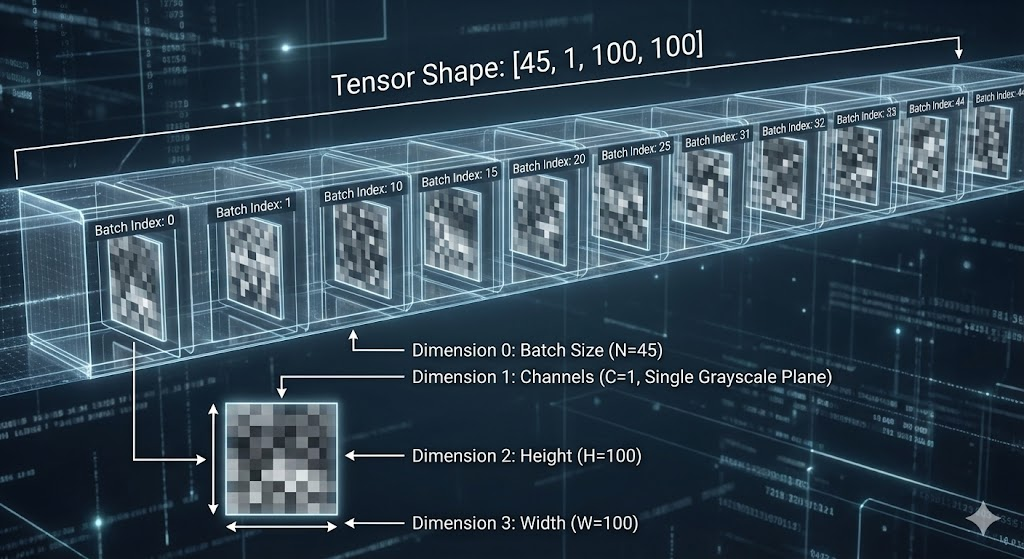


#### Greyscale Image
The following code illustrates creating a tensor with random pixel values and plotting the image.

In [ ]:
import torch
import matplotlib.pyplot as plt

# --- STEP 1: Define Dimensions ---
# Let's create a reasonably sized image (e.g., 100x100 pixels)
H = 100 # Height
W = 100 # Width
C = 1   # Channels (1 for grayscale)

# --- STEP 2: Create the Random PyTorch Tensor ---
# We use torch.rand() because it generates numbers between [0, 1].
# This is the standard range used to represent pixel intensity
# (0 = black, 1 = white).
# Remember PyTorch ordering: [Channels, Height, Width]
random_tensor = torch.rand(C, H, W)

print(f"PyTorch Tensor shape: {random_tensor.shape}")
# Output: torch.Size([1, 100, 100])


# --- STEP 3: Prepare the Tensor for Matplotlib ---
# CRITICAL STEP:
# PyTorch stores images as [C, H, W].
# Matplotlib wants grayscale images as just a 2D grid: [H, W].

# We need to remove that first dimension of size 1.
# The .squeeze() method removes any dimensions that have a size of 1.
image_to_plot = random_tensor.squeeze()

print(f"Shape adjusted for plotting: {image_to_plot.shape}")
# Output: torch.Size([100, 100])


# --- STEP 4: Display the Image ---
# We tell imshow to use the 'gray' colormap, otherwise it will
# render it using false colors (like purple and yellow).
plt.imshow(image_to_plot, cmap='gray')

# Optional styling to make it look nicer
plt.title("Random Grayscale Noise")
plt.axis('off') # Hides the X and Y axis ticks

# Show the plot
plt.show()

####RGB Image
An RGB image (100X100) is stored in a tensor as follows:

`[3,100,100]`

Note that the number of channels is 3. They stand for R, G and B values.

The following code creates a random RGB image and plots it.

In [ ]:
import torch

# 1. Define dimensions
C = 3    # Channels (RGB)
H = 100  # Height
W = 100  # Width

# 2. Create random tensor
# torch.rand() generates uniform random numbers between [0.0, 1.0)
rgb_float_image = torch.rand(C, H, W)

print("Shape:", rgb_float_image.shape)

# ============================================
# Prepare for Display
# ============================================
# We need to move dimension 0 (channels) to the end.
# The new order should be: dim 1 (H), dim 2 (W), dim 0 (C)
image_ready_for_plot = rgb_float_image.permute(1, 2, 0)

print(f"Shape adjusted for Matplotlib: {image_ready_for_plot.shape}")

# ============================================
# Display
# ============================================
# Matplotlib interprets floats [0.0-1.0] as colors correctly.
plt.imshow(image_ready_for_plot)
plt.title("Random RGB Image (Float [0-1])")
plt.axis('off') # Clean up the view by removing axes numbers
plt.show()


##Basic Tensor Operations: It's Like Math, But Faster!
Once you have tensors, you can perform a wide range of mathematical operations on them, much like with `NumPy` arrays.

**Element-wise Addition, Subtraction, Multiplication, Division**: These operations apply to corresponding elements. Tensors must have compatible shapes.

In [ ]:
t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[5, 6], [7, 8]])
print("t1:\n", t1)
print("t2:\n", t2)

sum_tensor = t1 + t2
product_tensor = t1 * t2 # Element-wise multiplication
print("Sum:\n", sum_tensor)
print("Element-wise Product:\n", product_tensor)

**Matrix Multiplication:** Crucial for neural networks. Use `@` for matrix multiplication or `torch.matmul()`.

In [ ]:
mat_product = t1 @ t2 # Matrix multiplication
print("Matrix Product:\n", mat_product)

**Reshaping:** Changing the dimensions of a tensor without changing its data. This is fundamental for feeding data into different layers of a neural network.

In [ ]:
original_tensor = torch.randn(2, 3) # A 2x3 tensor
print("Original Shape:", original_tensor.shape)
print("Original Tensor\n", original_tensor)

reshaped_tensor = original_tensor.view(3, 2) # Reshape to 3x2
print("Reshaped (view) Shape:\n", reshaped_tensor.shape)
print("Reshaped Tensor\n", reshaped_tensor)

flattened_tensor = original_tensor.view(-1) # Flatten to 1D, -1 infers the size
print("Flattened Shape:\n", flattened_tensor.shape)
print("Flattened Tensor\n", flattened_tensor)
# Note: .reshape() is another method, often preferred as it can handle non-contiguous memory
# reshaped_tensor_2 = original_tensor.reshape(3, 2)

**Device (CPU vs. GPU)**: Where the tensor's data is actually stored and computations are performed.
* CPU (Central Processing Unit): The default device. All tensors are created on the CPU unless specified otherwise.
* GPU (Graphics Processing Unit): If your Google Colab runtime is set to GPU (`Runtime -> Change runtime type -> Hardware accelerator -> GPU`) and `PyTorch` can detect it, you can move tensors to the GPU for faster computations.

You move tensors (and eventually models) to a device using the `.to()` method:

In [ ]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda') # Use GPU
    print("CUDA (GPU) is available! Using GPU for tensors.")
else:
    device = torch.device('cpu') # Fallback to CPU
    print("CUDA (GPU) not available. Using CPU for tensors.")

# Create a tensor on the CPU
cpu_tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(f"CPU Tensor: {cpu_tensor}, Device: {cpu_tensor.device}")

# Move the tensor to the GPU (if available)
gpu_tensor = cpu_tensor.to(device)
print(f"GPU Tensor: {gpu_tensor}, Device: {gpu_tensor.device}")

# Operations between tensors on different devices are NOT allowed.
# Always ensure both tensors are on the same device before performing operations.
# Example: If you have data on GPU and a model on CPU, you'll get an error.

Understanding Tensors is your first big step into the world of `PyTorch`. They are the versatile containers that will hold all your data and model parameters, enabling the powerful computations that drive deep learning models in FinTech and beyond.

#Autograd - The Engine Behind Learning
If Tensors are the raw materials of deep learning, then Autograd is the sophisticated engine that allows our models to learn. It's the core mechanism that makes PyTorch so powerful and flexible for building neural networks.

##The Core of Deep Learning: Calculating Gradients
At its heart, training a deep learning model is an optimization problem. We want to find the set of model parameters (weights and biases) that minimizes a "loss function." The loss function tells us how far off our model's predictions are from the true values.

To minimize this loss, we use an algorithm called **Gradient Descent** (or one of its many variants). Gradient descent works by iteratively adjusting the model's parameters in the direction that reduces the loss. The "direction" is given by the gradient.

For neural networks, these gradients need to be calculated with respect to every single parameter in the network, and this process involves applying the chain rule of calculus across potentially millions of operations. Doing this manually would be an impossible task!

## `requires_grad=True:` How PyTorch Tracks Operations
This is where PyTorch's Autograd system shines. It automates this complex process of calculating gradients. The key to enabling this is the `requires_grad=True` attribute of a Tensor.

When you define a tensor with `requires_grad=True`, you're telling PyTorch to keep track of all operations that involve it.

In [ ]:
# x and y are our "parameters" (or inputs we want gradients for)
# By setting requires_grad=True, PyTorch will build a computational graph
# to track all operations performed with these tensors.
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

print(f"x requires_grad: {x.requires_grad}") # Output: True
print(f"y requires_grad: {y.requires_grad}") # Output: True

# z is a result of operations involving x and y
# Because x and y require gradients, z will also "know" it's part of a gradient computation.
z = x**2 + y**3
print(f"z requires_grad: {z.requires_grad}") # Output: True

As PyTorch executes operations involving such tensors, it dynamically constructs a computation graph in the background. This graph records how the output (our loss) was derived from the inputs (our parameters).
## `.backward():` Computing Gradients
Once you have a scalar output tensor (typically your loss value) that was derived from tensors with `requires_grad=True`, you can call the `.backward()` method on it.

When `loss.backward()` is executed:

PyTorch traverses the computation graph backwards from the loss tensor.
It applies the chain rule at each step to compute the gradient of the loss with respect to every tensor that has `requires_grad=True` and was involved in calculating the loss.

These computed gradients are then accumulated into the `.grad` attribute of those respective tensors.

In [ ]:
# Our function: z = x^2 + y^3
# x=2, y=3 => z = 2^2 + 3^3 = 4 + 27 = 31

# Compute gradients
# This populates the .grad attribute for x and y
z.backward()

## `.grad`: Accessing Gradients
After `loss.backward()` has been called, you can access the computed gradients for any tensor that had `requires_grad=True` via its `.grad` attribute.

Let's look at our example:

$z = x^2 + y^3 $

The partial derivative of $z$ with respect to $x$ , $∂z/∂x$ is $2x$. Since $x=2$, $$ \frac{\partial z}{\partial x}=2x=4$$

The partial derivative of $z$ with respect to $y$ , $∂z/∂y$ is $3y^2$. Since $y=3$, $$ \frac{\partial z}{\partial y}=3y^2=27$$

In [ ]:
# Print gradients
print(f"Gradient of z with respect to x: {x.grad}") # Should be 2*x = 4
print(f"Gradient of z with respect to y: {y.grad}") # Should be 3*y^2 = 27

##Zeroing Gradients
One crucial aspect of Autograd is that gradients are accumulated. This means if you run `loss.backward()` multiple times without clearing the gradients, the new gradients will be added to the existing ones. For training neural networks, we usually want fresh gradients for each optimization step, so you'll often see `optimizer.zero_grad()` or `tensor.grad.zero_()` before a new backward pass.

In [ ]:
# Detaching a tensor: Stopping gradient tracking
# Sometimes you want to perform an operation but not track gradients for it.
# For example, when updating model parameters with the computed gradients.
a = torch.randn(2, 2, requires_grad=True)
b = a.detach() # b will be a new tensor, but gradient tracking for it is off
c = a * 2 # c still tracks gradients because 'a' requires them
print(f"a requires_grad: {a.requires_grad}") # True
print(f"b requires_grad: {b.requires_grad}") # False
print(f"c requires_grad: {c.requires_grad}") # True

# When updating parameters, we often use torch.no_grad() context manager
# to temporarily disable gradient tracking, ensuring updates are not part of the graph.
# Example: W.data -= learning_rate * W.grad (W.data accesses the raw tensor without grad history)
# Or, more commonly, within an optimizer's step() method.

Autograd is a cornerstone of modern deep learning. It frees us from the tedious and error-prone task of manual gradient computation, allowing us to focus on designing more sophisticated models and understanding the business problems we are trying to solve.

#Linear Regression with PyTorch - Manual Approach

In [ ]:
import torch
import matplotlib.pyplot as plt

# 1. Generate synthetic data
X = torch.randn(100, 1) * 10
y = 2 * X + 3 + torch.randn(100, 1) * 3 # y = 2x + 3 + noise

# 2. Initialize parameters
W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

learning_rate = 0.001
num_epochs = 1000

print(f"Initial W: {W.item():.4f}, b: {b.item():.4f}")

# Lists to store W and b values for plotting
W_history = []
b_history = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = X @ W + b

    # Calculate loss (Mean Squared Error)
    loss = ((y_pred - y)**2).mean()

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters manually using gradients
    with torch.no_grad(): # Disable gradient tracking for parameter updates
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

        # Store current W and b values
        W_history.append(W.item())
        b_history.append(b.item())

        # Zero the gradients for the next iteration
        W.grad.zero_()
        b.grad.zero_()

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print(f"Final W: {W.item():.4f}, b: {b.item():.4f}")

# Plotting W and b history
plt.figure(figsize=(10, 5))
plt.plot(W_history, label='W')
plt.plot(b_history, label='b')
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
plt.title('Evolution of W and b during training')
plt.legend()
plt.grid(True)
plt.show()

#PyTorch's `nn Module` and `optim` Package
Introducing torch.nn: predefined layers (nn.Linear, nn.ReLU, etc.).

**nn.Module:** the base class for all neural network modules.
Defining a simple neural network using nn.Sequential or by subclassing nn.Module.

**torch.optim:** optimizers like SGD, Adam.

**torch.nn.MSELoss:** common loss functions.
The cleaner training loop.

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Use the same synthetic data from before
X = torch.randn(100, 1) * 10
y = 2 * X + 3 + torch.randn(100, 1) * 3

# 1. Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1) # One input feature, one output feature

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
# Alternatively using nn.Sequential:
# model = nn.Sequential(nn.Linear(1, 1))


# 2. Define Loss function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 1000

print(f"Initial parameters: {list(model.parameters())}")

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update parameters

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print(f"Final parameters: {list(model.parameters())}")

# Visualizing the Model

It is often useful to call print on the model to see a summary of its structure.The simplest approach is to print the model.

In [ ]:
print(model)

There are other packages available as well to provide richer visualizations of the model. We will explore a few below.

##`torchsummary`

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
import torch
import torch.nn as nn

# The 'model' variable in the global scope has been overwritten by subsequent cells.
# To summarize the LinearRegression model, we need to re-instantiate it.

# Define the LinearRegression class (copied from cell Bht6tjUb2vxC for clarity)
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1) # One input feature, one output feature

    def forward(self, x):
        return self.linear(x)

# Create a new instance of the LinearRegression model for summary
model_for_summary = LinearRegression()

# The 'device' variable is globally defined in cell td0cy38M2ySt.
# Ensure the model is explicitly moved to the determined device.
print(f"Model parameters device BEFORE .to(device): {next(model_for_summary.parameters()).device}")
model_for_summary.to(device)
print(f"Model parameters device AFTER .to(device): {next(model_for_summary.parameters()).device}")

# Summarize the LinearRegression model.
# input_size=(1,) is correct for this model as it takes a single input feature.
print("\nSummary of LinearRegression Model:")
summary(model_for_summary, input_size=(1,), device=str(device))

# If you intended to summarize the ImageMLP model, the input_size would be different:
# For ImageMLP, the input is 28x28 images, which are flattened to 784.
# For example, if 'model' was still the ImageMLP from cZw9oByFANSD:
# current_image_mlp_model = ImageMLP() # You'd need to re-instantiate ImageMLP if 'model' was overwritten again
# current_image_mlp_model.to(device)
# print("\nSummary of ImageMLP Model (example, if that was the intended model):")
# summary(current_image_mlp_model, input_size=(1, 28, 28), device=str(device))


## torchviz
This library creates a visual graph of the model based on its forward pass. It can show how tensors flow through the network and highlight the operations.

In [ ]:
!pip install torchviz

In [ ]:
import torch
from torchviz import make_dot

# Create a dummy input tensor with the correct input shape (batch_size, number_of_features)
dummy_input = torch.randn(1, 1)

# Make a forward pass to build the computation graph
output = model(dummy_input)

# Generate the visualization
# We can specify the parameters to highlight in the graph
dot = make_dot(output, params=dict(list(model.named_parameters())))

# Display the visualization (this will typically generate a graph image)
dot

##`TensorBoard`
TensorBoard is a visualization toolkit for machine learning experiments. PyTorch integrates with it, allowing you to log the model's graph, training metrics, and more.

Here are the steps to use TensorBoard with your PyTorch model:

**Import necessary libraries:** You'll need torch.utils.tensorboard.SummaryWriter.

**Create a SummaryWriter:** This object will be used to write logs to a specified directory.

**Add the model graph to TensorBoard:** You can add the model's computational graph by passing a dummy input to the writer's add_graph() method.
This requires an instance of your model and a sample input tensor with the correct shape.

**Close the writer:** After you're done logging, close the writer.

**Launch TensorBoard:** You can launch TensorBoard directly within Google Colab.

After running the last cell, a TensorBoard interface should appear below the cell output. Click on the "Graphs" tab to see the visualization of your model's structure.

In [ ]:
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter instance. By default, logs will be saved in a 'runs' directory.
writer = SummaryWriter('runs/experiment')

# Create a dummy input tensor with the correct shape for your MLP model (batch_size, input_features)
dummy_input = torch.randn(1, 1)

# Add the graph
writer.add_graph(model, dummy_input)

# Close the writer
writer.close()

# Launch TensorBoard directly within Google Colab using the %load_ext and %tensorboard magic commands.
%load_ext tensorboard
%tensorboard --logdir runs/experiment


#Simple Multi-Layer Perceptron (MLP) for Classification
In the previous section, we built a model for linear regression. Here we will tackle a more complex task: classification. Many problems in FinTech are classification problems, such as:

* Will a customer default on a loan? (Yes/No)
* Is a transaction fraudulent? (Fraud/Not Fraud)
* Will a stock's price go up, down, or stay the same? (Multi-class classification)

To do this, we will introduce key concepts that are fundamental to building powerful neural networks:

**Non-linearities (Activation Functions):** Rectified Linear Unit (ReLU) allows our model to learn complex, non-linear patterns that a simple linear model cannot.

**Output Activations for Probability:** We'll use the Sigmoid activation function in the final layer to produce an output between 0 and 1, which can be interpreted as the probability of belonging to a specific class.

**Classification-Specific Loss Function**: We will use Binary Cross-Entropy Loss (nn.BCELoss), which is specifically designed for measuring the error in binary classification tasks.

##1. Generating a More Realistic and Interesting Dataset
The linear regression example used easily separable data. However, real-world financial data is almost never that clean. To build a model that can handle more complex relationships, we need a dataset that is not linearly separable.

We will use the `scikit-learn` library to generate a "moons" dataset, which is a classic example used to test classification algorithms.


In [ ]:
!pip install scikit-learn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# 1. Generate a synthetic "moons" dataset
# We use 500 data points and add some noise to make the task more realistic.
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# 2. Split the data into training and testing sets
# This is a critical step in machine learning. We train the model on the training set
# and then evaluate its performance on the unseen test set to get an unbiased
# measure of how well it generalizes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Convert NumPy arrays to PyTorch Tensors
# PyTorch models require data to be in the form of Tensors.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# The labels need to have the same number of dimensions as the model's output,
# so we use .view(-1, 1) to add a dimension.
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Let's visualize the data to understand the challenge. The plot will show two intertwined crescent shapes. A simple straight line cannot separate the blue and yellow points, which is why we need a neural network.

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 5))
# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.squeeze(), cmap='viridis', label='Training Data')
# Plot testing data with a different marker
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.squeeze(), cmap='autumn', marker='x', label='Testing Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic 'Moons' Dataset for Classification")
plt.legend()
plt.show()

##2. Defining the MLP Model
Our Multi-Layer Perceptron (MLP) will be a simple neural network with one hidden layer. This structure is sufficient to solve this non-linear problem.

**Input Layer:** Takes 2 features.

**Hidden Layer:** Will have 8 neurons and use the ReLU activation function. ReLU introduces non-linearity, allowing the model to learn the curved boundary between the two moons.

**Output Layer:** Will have 1 neuron and use the Sigmoid activation function to output a probability between 0 and 1.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # First linear layer: 2 input features -> 8 hidden units
        self.layer1 = nn.Linear(2, 8)
        # ReLU activation: introduces non-linearity
        self.relu = nn.ReLU()
        # Second linear layer: 8 hidden units -> 1 output unit
        self.layer2 = nn.Linear(8, 1)
        # Sigmoid activation: squashes the output to be between 0 and 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # This defines the forward pass of the network
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Create an instance of our model
model = MLP()
print(model)

##3. Training with a Single Batch (The Simple Approach)
To start, we will treat our entire training dataset as a single batch. This means we will calculate the loss over all training examples before updating our model's weights in each epoch. While simple, this approach can be computationally expensive and memory-intensive for large datasets.

We'll use Binary Cross-Entropy Loss (`nn.BCELoss`), the standard loss function for binary classification, and the `Adam` optimizer, which is a popular and effective alternative to SGD.

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define Loss function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy is suitable for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam is an efficient optimizer

num_epochs = 500

print("Training with a single batch...")
for epoch in range(num_epochs):
    # --- Forward pass ---
    # Feed the entire training data to the model
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # --- Backward and optimize ---
    # 1. Clear the gradients from the previous iteration
    optimizer.zero_grad()
    # 2. Compute the gradients of the loss with respect to model parameters
    loss.backward()
    # 3. Update the model parameters
    optimizer.step()

    # --- Logging and Evaluation ---
    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            # Convert outputs probabilities to predicted class (0 or 1)
            predicted = (test_outputs > 0.5).float()
            # Calculate accuracy
            accuracy = (predicted == y_test).float().mean()
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}")

print("\nFinished Training!")

##4. Improving Training with Mini-Batches and DataLoader
The single-batch approach has limitations. In real-world FinTech applications, datasets can contain millions or even billions of records (e.g., transaction data). Loading all of this into memory is impossible. The solution is mini-batch training. We divide the dataset into small, manageable chunks (mini-batches) and update the model's weights after processing each chunk.

Why is mini-batching better?

**Memory Efficiency:** It allows us to work with datasets that are far too large to fit into memory.

**Faster Convergence:** The model's weights are updated more frequently (once per mini-batch instead of once per epoch), which often leads to faster training.

**Improved Generalization:** The "noise" introduced by estimating the gradient on a small batch rather than the full dataset can help the model escape poor local minima and find a more robust solution.

PyTorch provides two excellent utilities to make this process easy:

`TensorDataset`: A class that wraps our features and labels tensors into a single dataset object.

`DataLoader`: An iterator that takes a Dataset and provides mini-batches of data, automatically handling shuffling and batching.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# 1. Create a TensorDataset from our training data
train_dataset = TensorDataset(X_train, y_train)

# 2. Create a DataLoader
batch_size = 32  # A common batch size
# shuffle=True is very important for training! It ensures that the data in each
# mini-batch is different for every epoch, preventing the model from learning
# the order of the data.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Re-initialize the model and optimizer to start fresh
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 500

print("\nTraining MLP with DataLoader (Mini-Batches):")
for epoch in range(num_epochs):
    # The DataLoader provides an iterator over the mini-batches
    for batch_features, batch_labels in train_loader:
        # --- Forward pass ---
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        # --- Backward and optimize ---
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # --- Logging and Evaluation (at the end of each epoch) ---
    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            predicted = (test_outputs > 0.5).float()
            accuracy = (predicted == y_test).float().mean()
            # The loss here is just for the last batch of the epoch, but accuracy is on the full test set.
            print(f"Epoch [{epoch+1}/{num_epochs}], Last Batch Loss: {loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}")


#A Complete Workflow: MLP on Real-World Data
So far, we have worked with synthetically generated data. In most environments, you'll be working with data from external sources, most commonly CSV files. This section will walk you through the complete end-to-end process:

* Loading an external dataset using the `pandas` library.
* Preprocessing the data, a critical step to prepare it for a neural network.
* Building and training an MLP model on this real-world data.

We will use a dataset on heart disease prediction which involves predicting a binary outcome based on a set of diverse features.We will first  load the data directly from a URL into a `pandas` DataFrame.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a URL
url = 'http://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
df = pd.read_csv(url)

# Display the first 5 rows to understand its structure
print("--- First 5 rows of the dataset ---")
print(df.head())

# Check for any missing values
print("\n--- Missing values per column ---")
print(df.isnull().sum())

##1. Preprocessing for the Neural Network
Neural networks work best with numerical data and are sensitive to the scale of the input features. For example, a feature like `chol` (cholesterol) has a much larger range of values than `sex`. This can make training unstable. Therefore, we must standardize our data.

In [ ]:
# 1. Separate features (X) from the target label (y)
X = df.drop('target', axis=1)
y = df['target']

# Identify non-numeric columns (likely strings or objects)
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Perform one-hot encoding on all non-numeric columns
# pd.get_dummies will convert these columns into numerical representations
# drop_first=True avoids multicollinearity by dropping the first category of each feature
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features
# We create a scaler object, fit it ONLY on the training data to learn the mean and standard deviation,
# and then use it to transform both the training and testing data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Convert the processed data into PyTorch Tensors
X_train = torch.FloatTensor(X_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

print(f"\nShape of scaled training features: {X_train.shape}")
print(f"Shape of scaled testing features: {X_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

##2. Setting up DataLoaders, Model, and Training Loop
This part of the process should now feel familiar. We will use `TensorDataset` and `DataLoader` to create mini-batches, define an MLP with an input size that matches our number of features, and then run the training loop.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the model. The input features must match the number of columns in our X data.
# The `X_train.shape[1]` programmatically gets this number.
class HeartDiseaseMLP(nn.Module):
    def __init__(self, input_features):
        super().__init__()
        self.layer1 = nn.Linear(input_features, 20)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(20, 10)
        # Adding a second hidden layer for more capacity
        self.layer3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

model = HeartDiseaseMLP(input_features=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training Loop ---
num_epochs = 100
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # --- Evaluation at the end of each epoch ---
    if (epoch + 1) % 10 == 0:
        model.eval() # Set the model to evaluation mode
        with torch.no_grad():
            correct = 0
            total = 0
            for features, labels in test_loader:
                outputs = model(features)
                predicted = (outputs > 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            accuracy = 100 * correct / total
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.2f}%")

## 3. Displaying Predicted vs. Actual Outcomes

After training and evaluating the model, it's often helpful to see the model's predictions for individual test examples and compare them to the actual true labels. This can give you a better sense of where the model is making correct predictions and where it might be struggling.

The following code cell will iterate through the test dataset using the `test_loader`. For each batch of test data, it will:
1.  Pass the features through the trained model to get the predicted probabilities.
2.  Convert these probabilities into binary class predictions (0 or 1) by applying a threshold (in this case, 0.5).
3.  Collect the actual true labels and the model's predicted labels for all test examples.
4.  Finally, it will organize these actual and predicted labels into a pandas DataFrame for clear display.

In [ ]:
import pandas as pd

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    all_predicted = []
    all_labels = []

    # Iterate through the test data
    for features, labels in test_loader:
        # Get model outputs
        outputs = model(features)

        # Convert probabilities to predicted class (0 or 1)
        predicted = (outputs > 0.5).float()

        # Append to lists
        all_predicted.extend(predicted.squeeze().tolist())
        all_labels.extend(labels.squeeze().tolist())

# Create a pandas DataFrame to display results
results_df = pd.DataFrame({
    'Actual Label': all_labels,
    'Predicted Label': all_predicted
})

print("\n--- Predicted vs. Actual Outcomes for Test Data ---")
display(results_df)

#Introduction to Image Classification with an MLP
While MLPs are incredibly versatile, they can even be used for tasks like image classification. In FinTech, this could be applied to problems like signature verification from check images, or document classification from scanned images.
We will use the famous MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits (0-9). Our goal is to train a model that can correctly identify the digit in each image.

To make this work with our MLP, we will employ a simple but powerful trick: we will flatten each 28x28 image into a single, long vector of 784 pixels (28 * 28 = 784). This vector will then be the input to our MLP.

##Step 1: Loading and Preparing the MNIST Dataset
PyTorch, through its torchvision library, makes it incredibly easy to download and use standard datasets like MNIST.

In [ ]:
import torchvision
import torchvision.transforms as transforms

# 1. Define a transformation
# `transforms.ToTensor()` converts the image into a PyTorch tensor and scales pixel values to be between 0 and 1.
# `transforms.Normalize()` adjusts the tensor values to have a mean of 0.5 and a standard deviation of 0.5.
# This helps stabilize training.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 2. Download and create datasets
# PyTorch will automatically download the data to the specified root directory.
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# 3. Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

##Step 2: Visualizing the Data
It is always a good idea to look at a few examples from your dataset to make sure everything is as you expect.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show the first 4 images from the batch
imshow(torchvision.utils.make_grid(images[:4]))
# Print the corresponding labels
print('Labels:', ' '.join(f'{labels[j]}' for j in range(4)))

##Step 3: Defining and Training the Image Classification MLP
Our model architecture will be similar to before, but with two key differences:

**Input Layer Size:** Will be 784 to accommodate the flattened 28x28 images.
**Output Layer Size:** Will be 10, one for each digit (0-9). This is a multi-class classification problem.

For multi-class classification, we will use `nn.CrossEntropyLoss`. This loss function is the standard for this type of problem and conveniently includes the final activation function (Softmax) within its calculation for better numerical stability. Therefore, our model will output raw scores (logits), not probabilities.

In [ ]:
# Model Definition
class ImageMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # The input layer size is 28*28 = 784
        self.layer1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        # The output layer size is 10 for the 10 digits
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        # The forward pass now includes flattening the image
        x = x.view(-1, 28 * 28) # Flatten the image
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        # No final activation function here, as CrossEntropyLoss will apply it
        x = self.layer3(x)
        return x

model = ImageMLP()
# Use CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training Loop ---
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print("\nFinished Training!")

# --- Final Evaluation ---
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        # torch.max returns (value, index). We are interested in the index (the predicted class)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')

Even with a simple MLP, you  see a surprisingly high accuracy. This demonstrates the power of neural networks. This also provides a great foundation for Convolutional Neural Networks (CNNs), which are specifically designed for image data and achieve even better performance by not discarding the spatial structure of the pixels.

## Step 4: Visualize some of the predictions
This code below visualizes examples of the model's performance on the MNIST test set, showing both correctly and incorrectly predicted images.

Here's what the code does:

1.  **Set Model to Evaluation Mode**: `model.eval()` puts the model in evaluation mode, which is important for layers that behave differently during training and testing (like dropout, although not used in this specific MLP).
2.  **Disable Gradient Calculation**: `with torch.no_grad():` ensures that gradients are not computed during this block. This is not needed for inference and saves memory.
3.  **Collect Predictions and Labels**: It iterates through the `test_loader` to get all test images, their actual labels, and the model's predicted labels. These are collected into lists and then concatenated into single tensors.
4.  **Identify Correct and Incorrect Predictions**: It compares the `all_predicted` labels with the `all_labels` to find the indices where the predictions were correct and where they were incorrect.
5.  **Select Sample Indices**: It randomly selects a specified number of indices (`num_examples_to_show`, set to 5) from both the correct and incorrect prediction sets. This ensures that you see a diverse set of examples each time you run the code.
6.  **Display Correct Predictions**: It iterates through the selected correct indices, retrieves the corresponding image, actual label, and predicted label. It then uses `matplotlib` to display the image with the actual and predicted labels in green to indicate a correct prediction. The image is un-normalized (`/ 2 + 0.5`) to display correctly.
7.  **Display Incorrect Predictions**: Similarly, it iterates through the selected incorrect indices and displays the images with actual and predicted labels in red to highlight the errors.

This visualization helps you quickly assess the types of images your model is handling well and the ones it is struggling with.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    all_images = []
    all_labels = []
    all_predicted = []

    # Iterate through the test data
    for images, labels in test_loader:
        # Get model outputs (logits)
        outputs = model(images)

        # Get predicted class (index of max logit)
        _, predicted = torch.max(outputs.data, 1)

        # Append to lists
        all_images.append(images)
        all_labels.append(labels)
        all_predicted.append(predicted)

# Concatenate all batches
all_images = torch.cat(all_images)
all_labels = torch.cat(all_labels)
all_predicted = torch.cat(all_predicted)

# Identify correct and incorrect predictions
correct_indices = (all_predicted == all_labels).nonzero(as_tuple=True)[0]
incorrect_indices = (all_predicted != all_labels).nonzero(as_tuple=True)[0]

# Select 5 random correct and 5 random incorrect indices
num_examples_to_show = 5
if len(correct_indices) > num_examples_to_show:
    correct_sample_indices = correct_indices[torch.randperm(len(correct_indices))][:num_examples_to_show]
else:
    correct_sample_indices = correct_indices

if len(incorrect_indices) > num_examples_to_show:
    incorrect_sample_indices = incorrect_indices[torch.randperm(len(incorrect_indices))][:num_examples_to_show]
else:
    incorrect_sample_indices = incorrect_indices

# --- Display Correct Predictions ---
print("--- Examples of Correct Predictions ---")
plt.figure(figsize=(10, 4))
for i, idx in enumerate(correct_sample_indices):
    plt.subplot(1, num_examples_to_show, i + 1)
    # Un-normalize and reshape the image for plotting
    img = all_images[idx].squeeze() / 2 + 0.5
    plt.imshow(img.numpy(), cmap='gray')
    plt.title(f"Actual: {all_labels[idx].item()}\nPred: {all_predicted[idx].item()}", color='green')
    plt.axis('off')
plt.tight_layout()
plt.show()

# --- Display Incorrect Predictions ---
print("\n--- Examples of Incorrect Predictions ---")
plt.figure(figsize=(10, 4))
for i, idx in enumerate(incorrect_sample_indices):
    plt.subplot(1, num_examples_to_show, i + 1)
    # Un-normalize and reshape the image for plotting
    img = all_images[idx].squeeze() / 2 + 0.5
    plt.imshow(img.numpy(), cmap='gray')
    plt.title(f"Actual: {all_labels[idx].item()}\nPred: {all_predicted[idx].item()}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Required Tasks
Now that you've learned the fundamentals of PyTorch, it's time to put your skills to the test! These exercises are designed to reinforce the key concepts we covered, from the core mechanics of Autograd to building and training full classification models.

##Required Task 2: Exploring Autograd with a Complex Function
This exercise tests your understanding of PyTorch's automatic differentiation engine, Autograd. You will manually define a function with multiple variables, ask PyTorch to compute the gradients, and then verify the results.

**Your Goal:** Calculate the partial derivatives of the following function with respect to $w$, $x$, and $b$.


Let the function be:
$$ z = σ(w.x^2) + {1 \over b^3}$$


where $σ$ is the sigmoid function, which in PyTorch is `torch.sigmoid()`.

Given Initial Values:
$$w = 2.0$$
$$x = 4.0$$
$$b = 1.5$$

**Your Task:**

1. Create three tensors for $w$, $x$, and $b$ with the given initial values. Make sure PyTorch tracks their gradients.

2. Write the Python code to compute z using these tensors.

3. Call the .backward() method to compute the gradients.

4. Print the computed gradients for w, x, and b.

Hint: Remember to set `requires_grad=True` when you create the tensors. The gradient of a tensor **t** is stored in **t.grad** after you call `.backward()` on the final output.

##Required Task 3: End-to-End Binary Classification - Loan Default Prediction
This problem challenges you to apply the full end-to-end workflow on a new dataset. You will predict whether a bank customer is likely to default on a loan, a classic FinTech problem.

Your Goal: Build, train, and evaluate an MLP to predict credit risk using the "German Credit Data" dataset.

**Your Task:**
1. Load Data: Load the dataset from the following URL into a pandas DataFrame. The target column is named Creditability.
URL: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

Note: This file has no header. You will need to manually assign column names. A list of names is provided in the solution hint.

2. Preprocess the Data:
* The data is space-separated.
* Many columns are categorical (e.g., 'A11', 'A32'). Use one-hot encoding (pd.get_dummies) to convert them into numerical format.
* Standardize all numerical features using `StandardScaler`.
* Split the data into an 80% training set and a 20% testing set.
* Create DataLoaders: Convert your processed data into PyTorch Tensors and create DataLoaders for both the training and test sets.
* Build an MLP: Define a new `nn.Module` class for your MLP. It should have at least two hidden layers. You can choose the number of neurons in each layer.
* Train the Model: Write a training loop. Use `nn.BCELoss` and the `Adam` optimizer. Train for at least 50 epochs.
* Evaluate the Model: After training, calculate and print the final accuracy on the test set.

**Hint:**
* **Column Names**: You can use this list of column names: ["Status of existing checking account", "Duration in month", "Credit history", "Purpose", "Credit amount", "Savings account/bonds", "Present employment since", "Installment rate in percentage of disposable income", "Personal status and sex", "Other debtors / guarantors", "Present residence since", "Property", "Age in years", "Other installment plans", "Housing", "Number of existing credits at this bank", "Job", "Number of people being liable to provide maintenance for", "Telephone", "foreign worker", "Creditability"].
* **Preprocessing**: Remember to apply StandardScaler after you split the data to avoid data leakage from the test set into the training set. Fit the scaler on the training data and use it to transform both train and test data.
* **Target Column**: The original target (`Creditability`) has values 1 (Good) and 2 (Bad). You should map this to 0 (Bad) and 1 (Good) to be compatible with `nn.BCELoss`. y = y.replace({1: 1, 2: 0}).

##Required Task 4: Image Classification with an MLP on Fashion-MNIST
This problem tests your ability to adapt the image classification code to a new, slightly more challenging dataset. Fashion-MNIST has the same format as MNIST (28x28 grayscale images, 10 classes) but features clothing items instead of digits, making it a harder task.

**Your Goal:** Train an MLP to classify images of clothing from the Fashion-MNIST dataset.

**Your Task:**
1. **Load Data**: Use `torchvision.datasets` to load the FashionMNIST dataset. The process is almost identical to how you loaded MNIST. Create training and testing DataLoaders.
2. **Define a Model**: You can reuse the ImageMLP architecture from the tutorial, as the input (784) and output (10) dimensions are the same.
3. **Train the Model**: Write a training loop using `nn.CrossEntropyLoss` and the `Adam` optimizer. Train for 10 epochs.
4. **Evaluate**: Calculate and print the final accuracy on the 10,000 test images.
5. **Visualize**: Visualize a few correct and incorrect predictions.


**Hint:**

This is a "drop-in replacement" exercise. The vast majority of your MNIST code will work here. You only need to change `torchvision.datasets.MNIST` to `torchvision.datasets.FashionMNIST`. Pay attention to how you define and train the model—it should be a multi-class classification setup.